# Quantitative Analysis

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Custom Module

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data_loader import DataLoader
from src.quantitative_analysis import QuantitativeAnalysis

## Data Loading

In [3]:
data_dir = '../data'
stock_data_path = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
stock_list = ['AAPL', 'AMZN', 'GOOG', 'FB', 'MSF', 'NVDA', 'TSLA']
data_dict = {}

for stock in stock_data_path:
    file_path = os.path.join(data_dir, f"{stock}_historical_data.csv")

    try:
        df = DataLoader.load_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

    if stock == 'META':
        stock = 'FB'
    
    if stock == 'MSFT':
        stock = 'MSF'

    # Ensure proper datetime parsing
    quantitativeAnalysis = QuantitativeAnalysis(df, stock)
    quantitativeAnalysis.format_datetime()
    quantitativeAnalysis.set_date_index()
    
    data_dict[stock] = df


In [4]:
for stock, df in data_dict.items():
    print(f"\n--- {stock} ---")
    print(df.head())


--- AAPL ---
                               Open      High       Low     Close  Adj Close  \
Date                                                                           
1980-12-12 00:00:00+00:00  0.128348  0.128906  0.128348  0.128348   0.098943   
1980-12-15 00:00:00+00:00  0.122210  0.122210  0.121652  0.121652   0.093781   
1980-12-16 00:00:00+00:00  0.113281  0.113281  0.112723  0.112723   0.086898   
1980-12-17 00:00:00+00:00  0.115513  0.116071  0.115513  0.115513   0.089049   
1980-12-18 00:00:00+00:00  0.118862  0.119420  0.118862  0.118862   0.091630   

                              Volume  Dividends  Stock Splits  
Date                                                           
1980-12-12 00:00:00+00:00  469033600        0.0           0.0  
1980-12-15 00:00:00+00:00  175884800        0.0           0.0  
1980-12-16 00:00:00+00:00  105728000        0.0           0.0  
1980-12-17 00:00:00+00:00   86441600        0.0           0.0  
1980-12-18 00:00:00+00:00   73449600     

In [5]:
# Calculate technical indicators for each stock
for stock, df in data_dict.items():
    quantitativeAnalysis = QuantitativeAnalysis(df, stock)
    data_dict[stock] = quantitativeAnalysis.calculate_technical_indicators()

In [6]:
# Display the last few rows of each stock's technical indicators	
for stock, df in data_dict.items():
    print(f"\n--- {stock} ---")
    print(df[['SMA_20', 'EMA_20', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].tail())


--- AAPL ---
                               SMA_20      EMA_20     RSI_14      MACD  \
Date                                                                     
2024-07-24 00:00:00+00:00  224.228500  222.376929  48.687742  4.662717   
2024-07-25 00:00:00+00:00  224.440500  221.911508  47.386437  3.748082   
2024-07-26 00:00:00+00:00  224.633500  221.535174  48.055700  3.026267   
2024-07-29 00:00:00+00:00  225.014500  221.221349  48.476184  2.448591   
2024-07-30 00:00:00+00:00  225.117001  220.990744  49.359115  2.012764   

                           MACD_signal  MACD_hist  
Date                                               
2024-07-24 00:00:00+00:00     6.678882  -2.016164  
2024-07-25 00:00:00+00:00     6.092722  -2.344640  
2024-07-26 00:00:00+00:00     5.479431  -2.453164  
2024-07-29 00:00:00+00:00     4.873263  -2.424672  
2024-07-30 00:00:00+00:00     4.301163  -2.288399  

--- AMZN ---
                             SMA_20      EMA_20     RSI_14      MACD  \
Date             

In [7]:
# Calculate financial metrics for each stock
for stock, df in data_dict.items():
    quantitativeAnalysis = QuantitativeAnalysis(df, stock)
    data_dict[stock] = quantitativeAnalysis.calculate_financial_metrics()

In [8]:
# Display the last few rows of each stock's financial metrics
for stock, df in data_dict.items():
    print(f"\n--- {stock} ---")
    print(df[['daily_return', 'volatility_20',]].tail())


--- AAPL ---
                           daily_return  volatility_20
Date                                                  
2024-07-24 00:00:00+00:00     -0.028754       0.270031
2024-07-25 00:00:00+00:00     -0.004805       0.262797
2024-07-26 00:00:00+00:00      0.002161       0.262613
2024-07-29 00:00:00+00:00      0.001285       0.254564
2024-07-30 00:00:00+00:00      0.002566       0.233509

--- AMZN ---
                           daily_return  volatility_20
Date                                                  
2024-07-24 00:00:00+00:00     -0.029934       0.296960
2024-07-25 00:00:00+00:00     -0.005419       0.255940
2024-07-26 00:00:00+00:00      0.014734       0.247616
2024-07-29 00:00:00+00:00      0.003836       0.238044
2024-07-30 00:00:00+00:00     -0.008133       0.222530

--- GOOG ---
                           daily_return  volatility_20
Date                                                  
2024-07-24 00:00:00+00:00     -0.050272       0.278574
2024-07-25 00:00:00+00:


--- AAPL ---


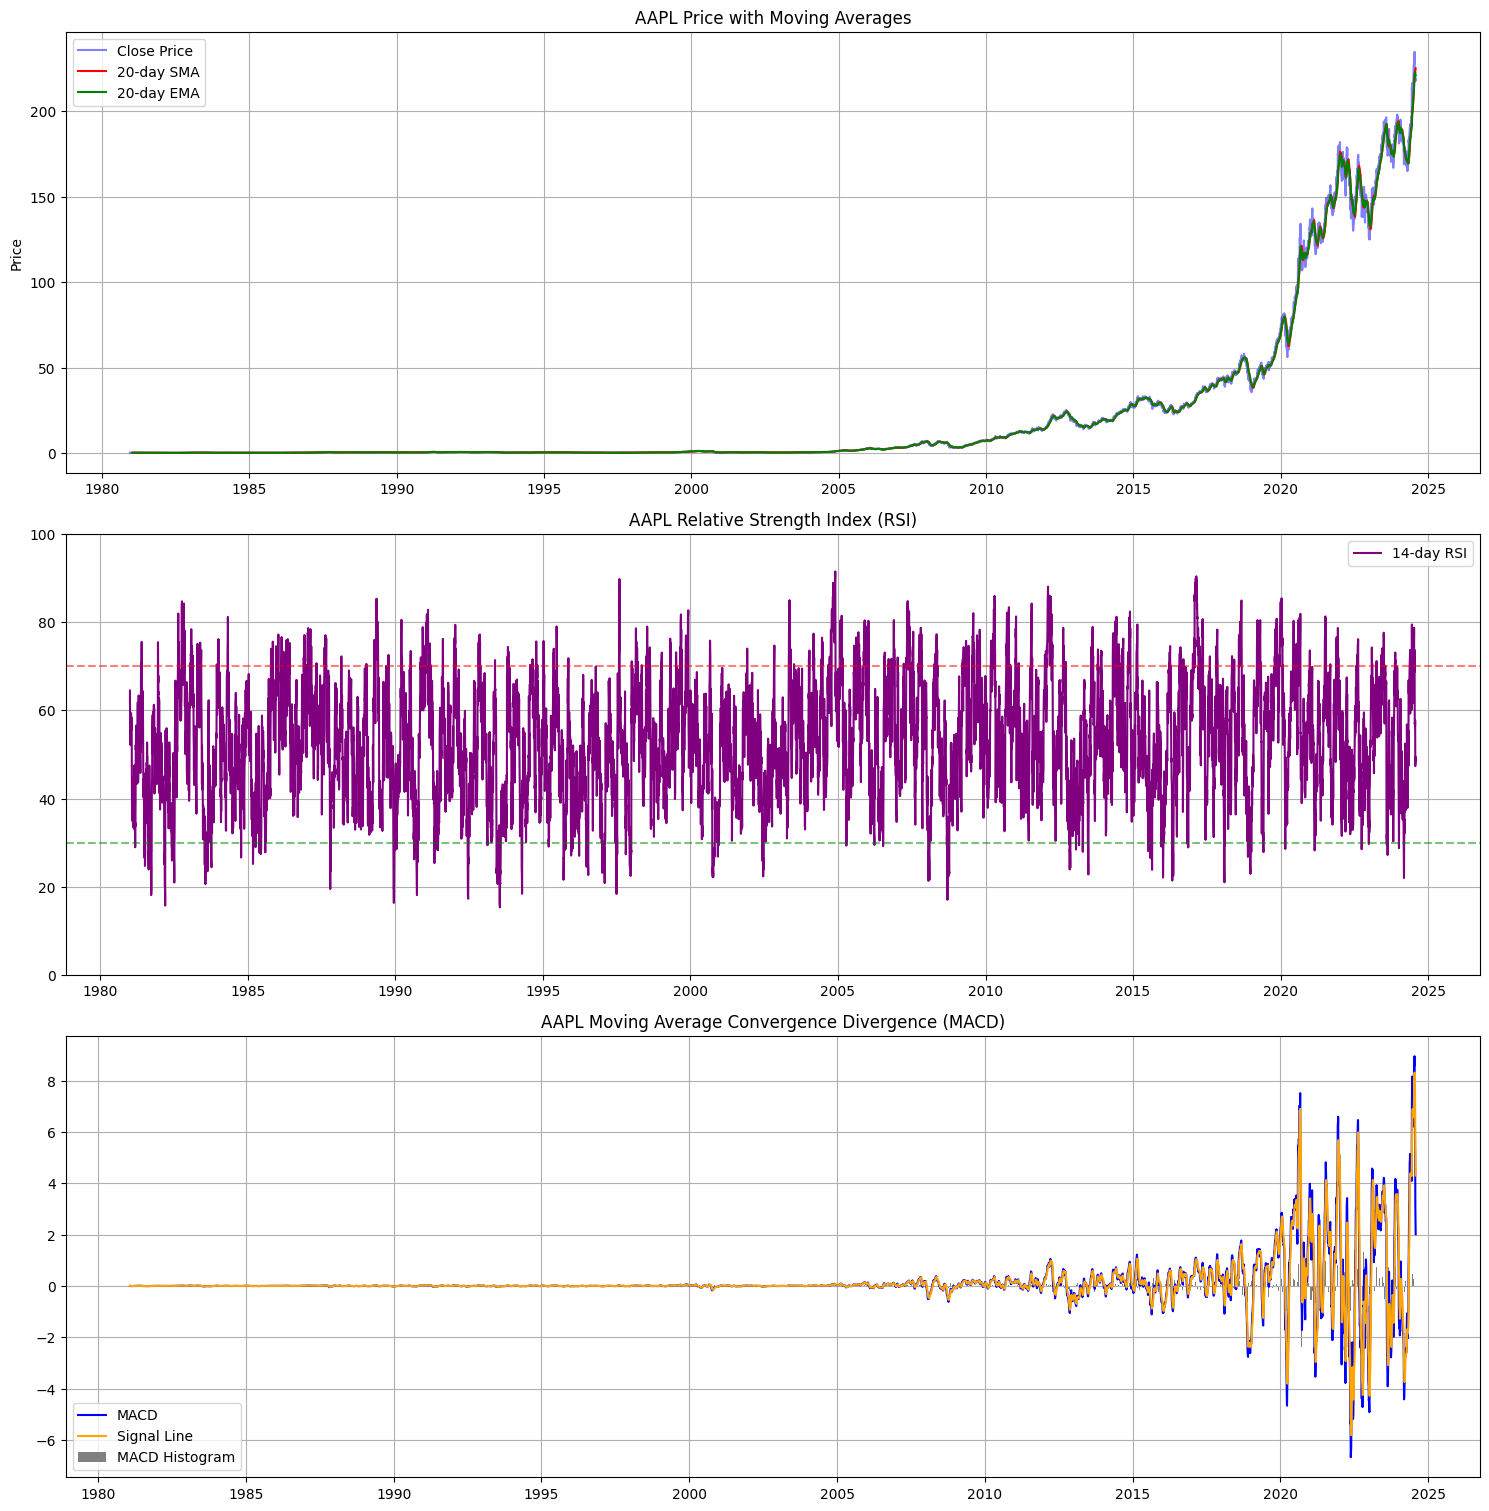


--- AMZN ---


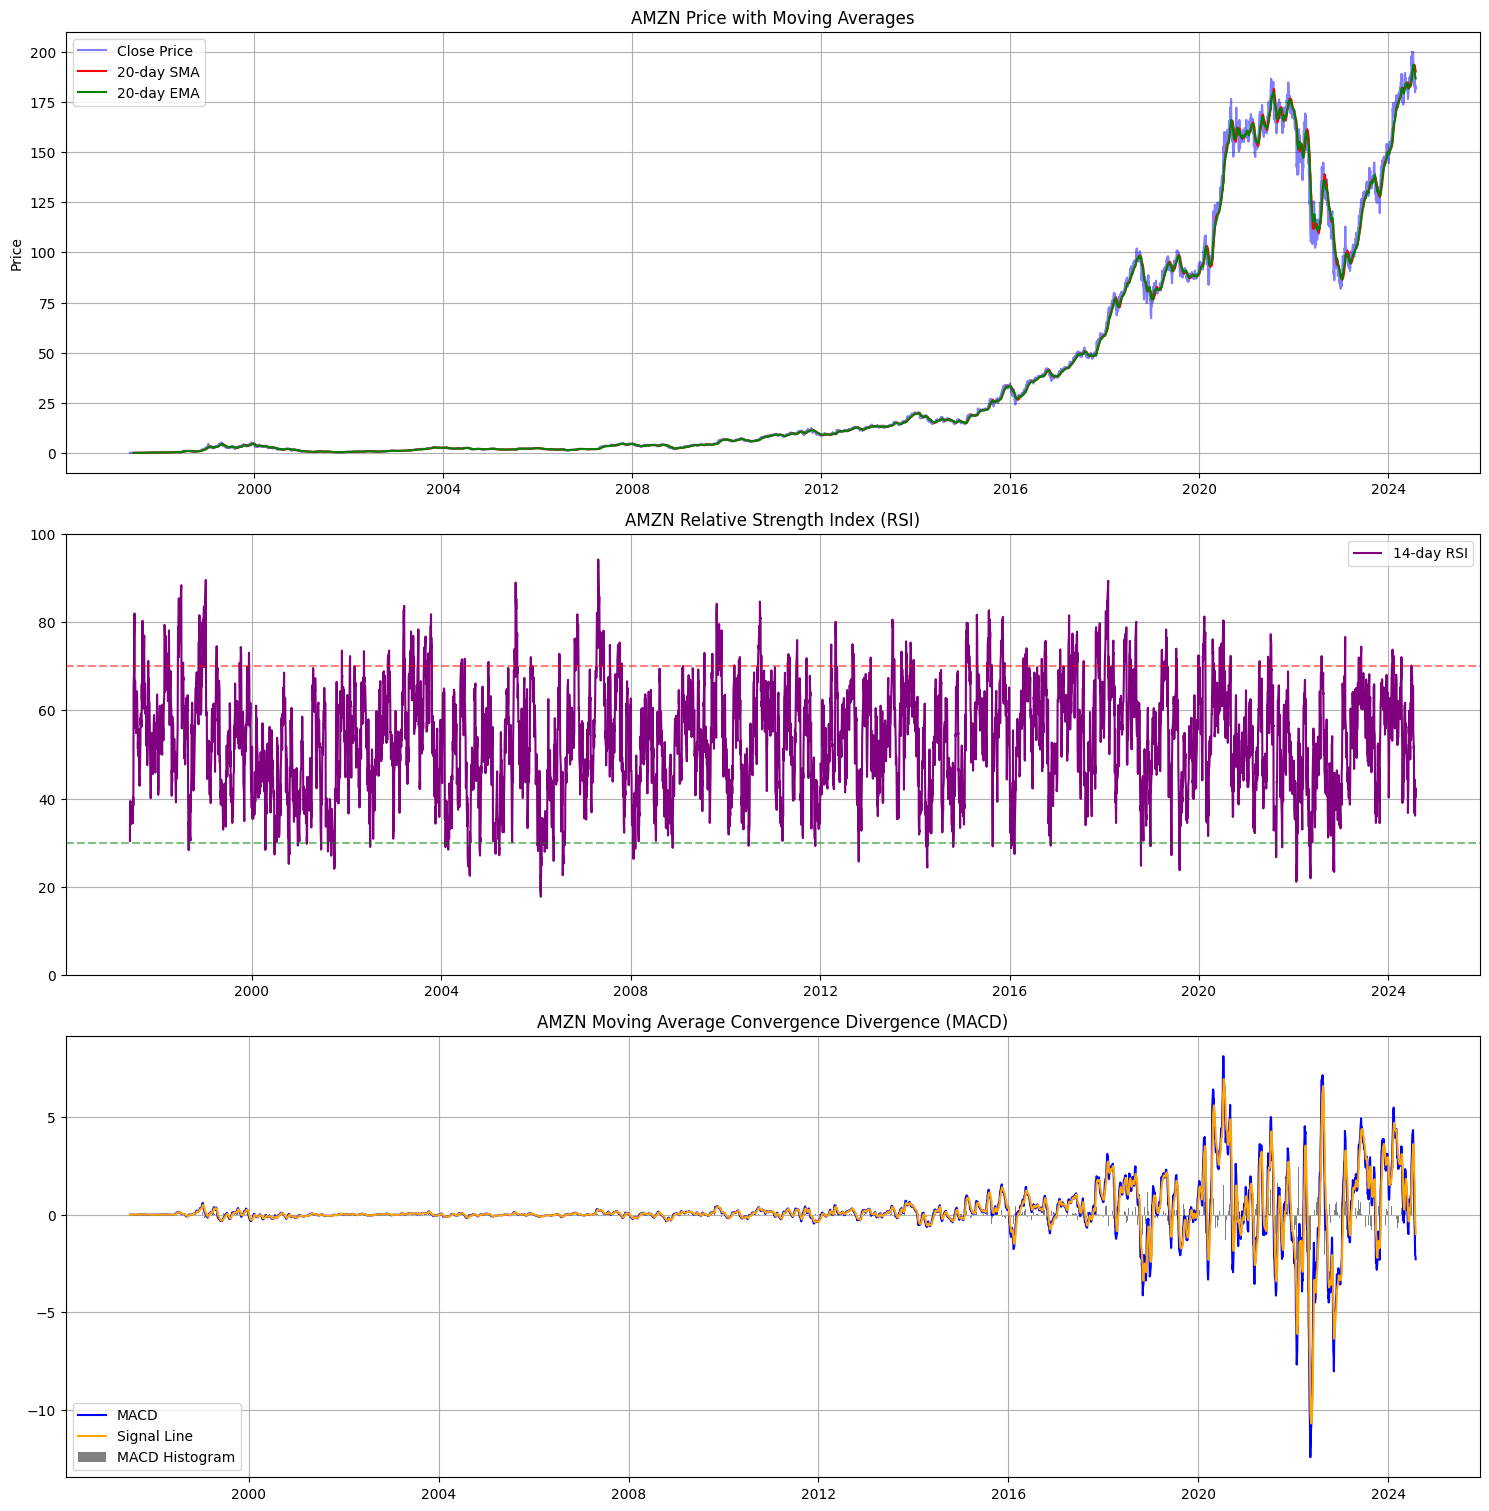


--- GOOG ---


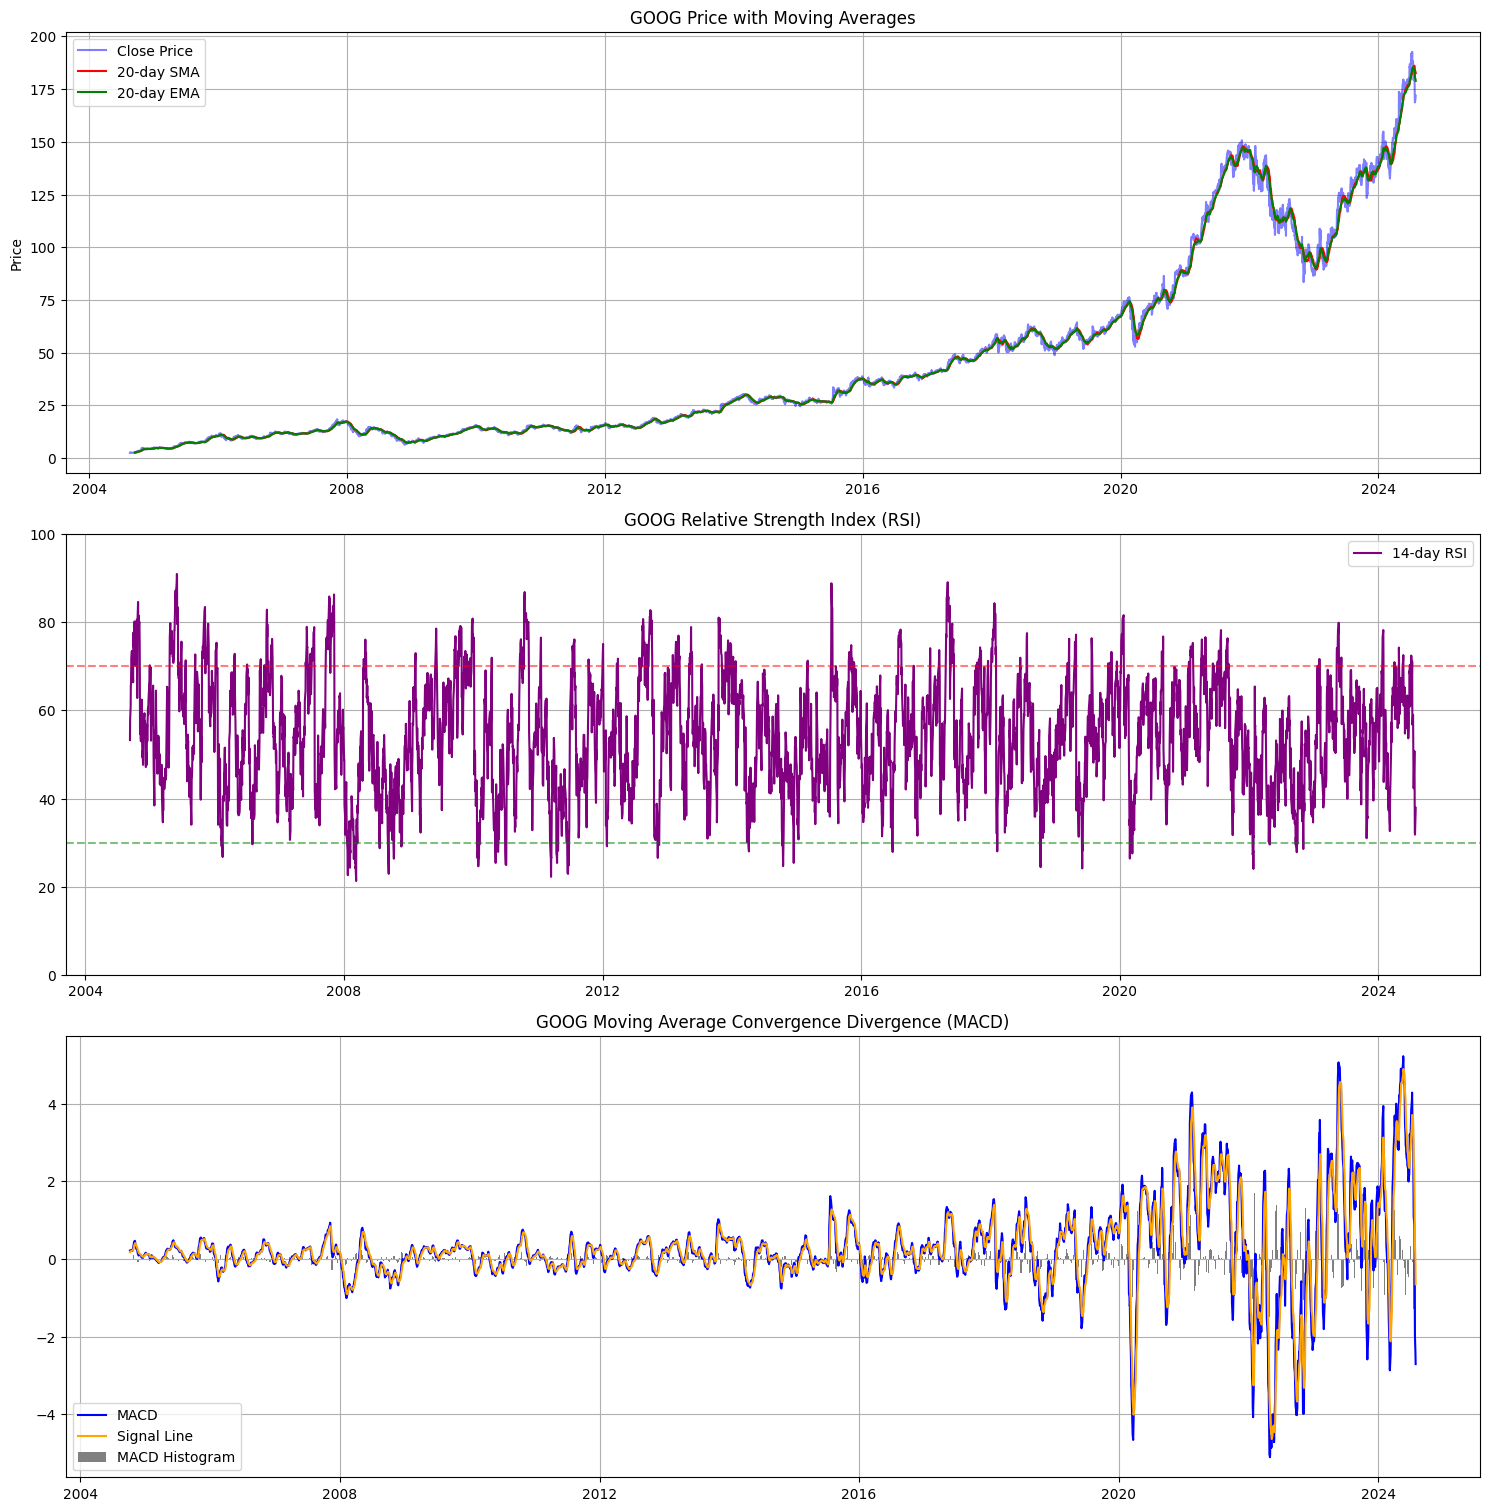


--- FB ---


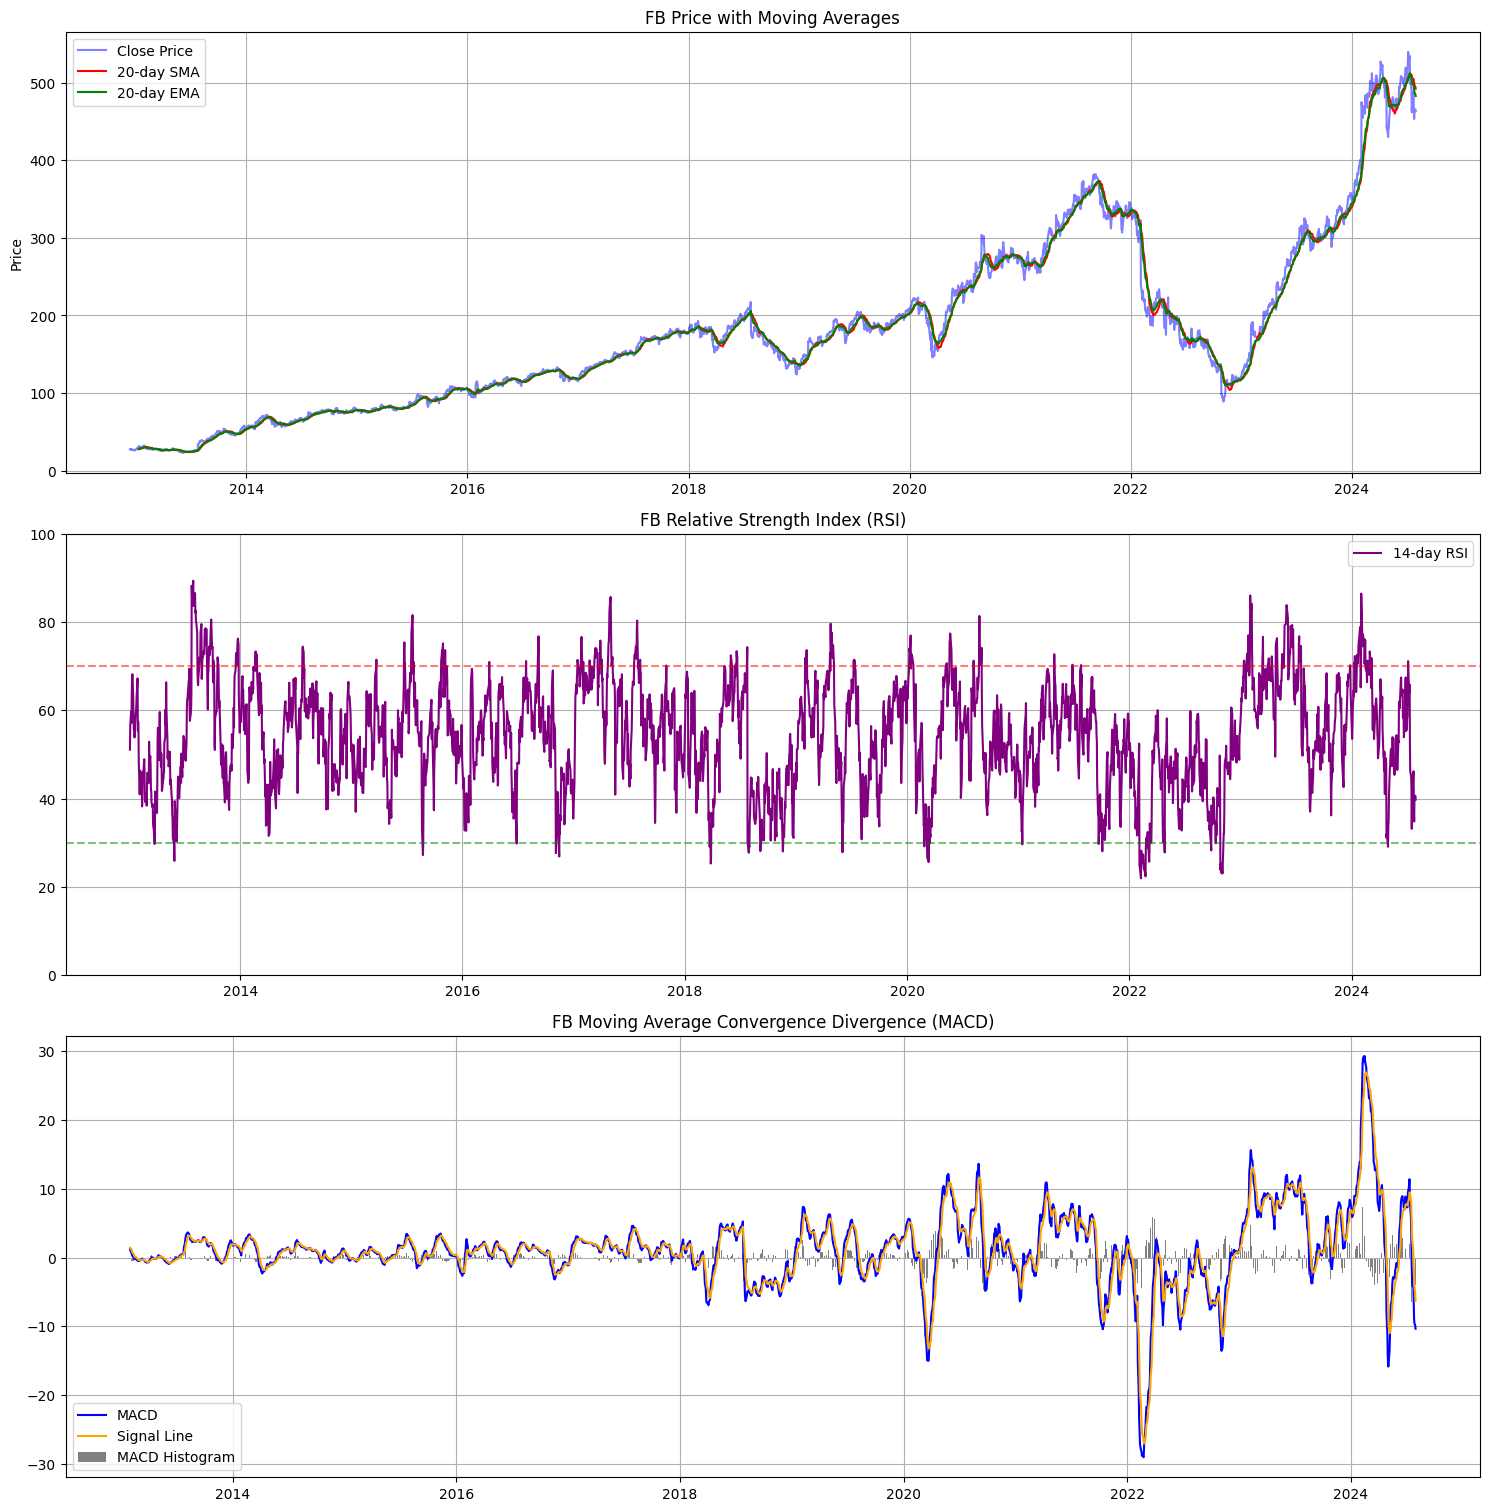


--- MSF ---


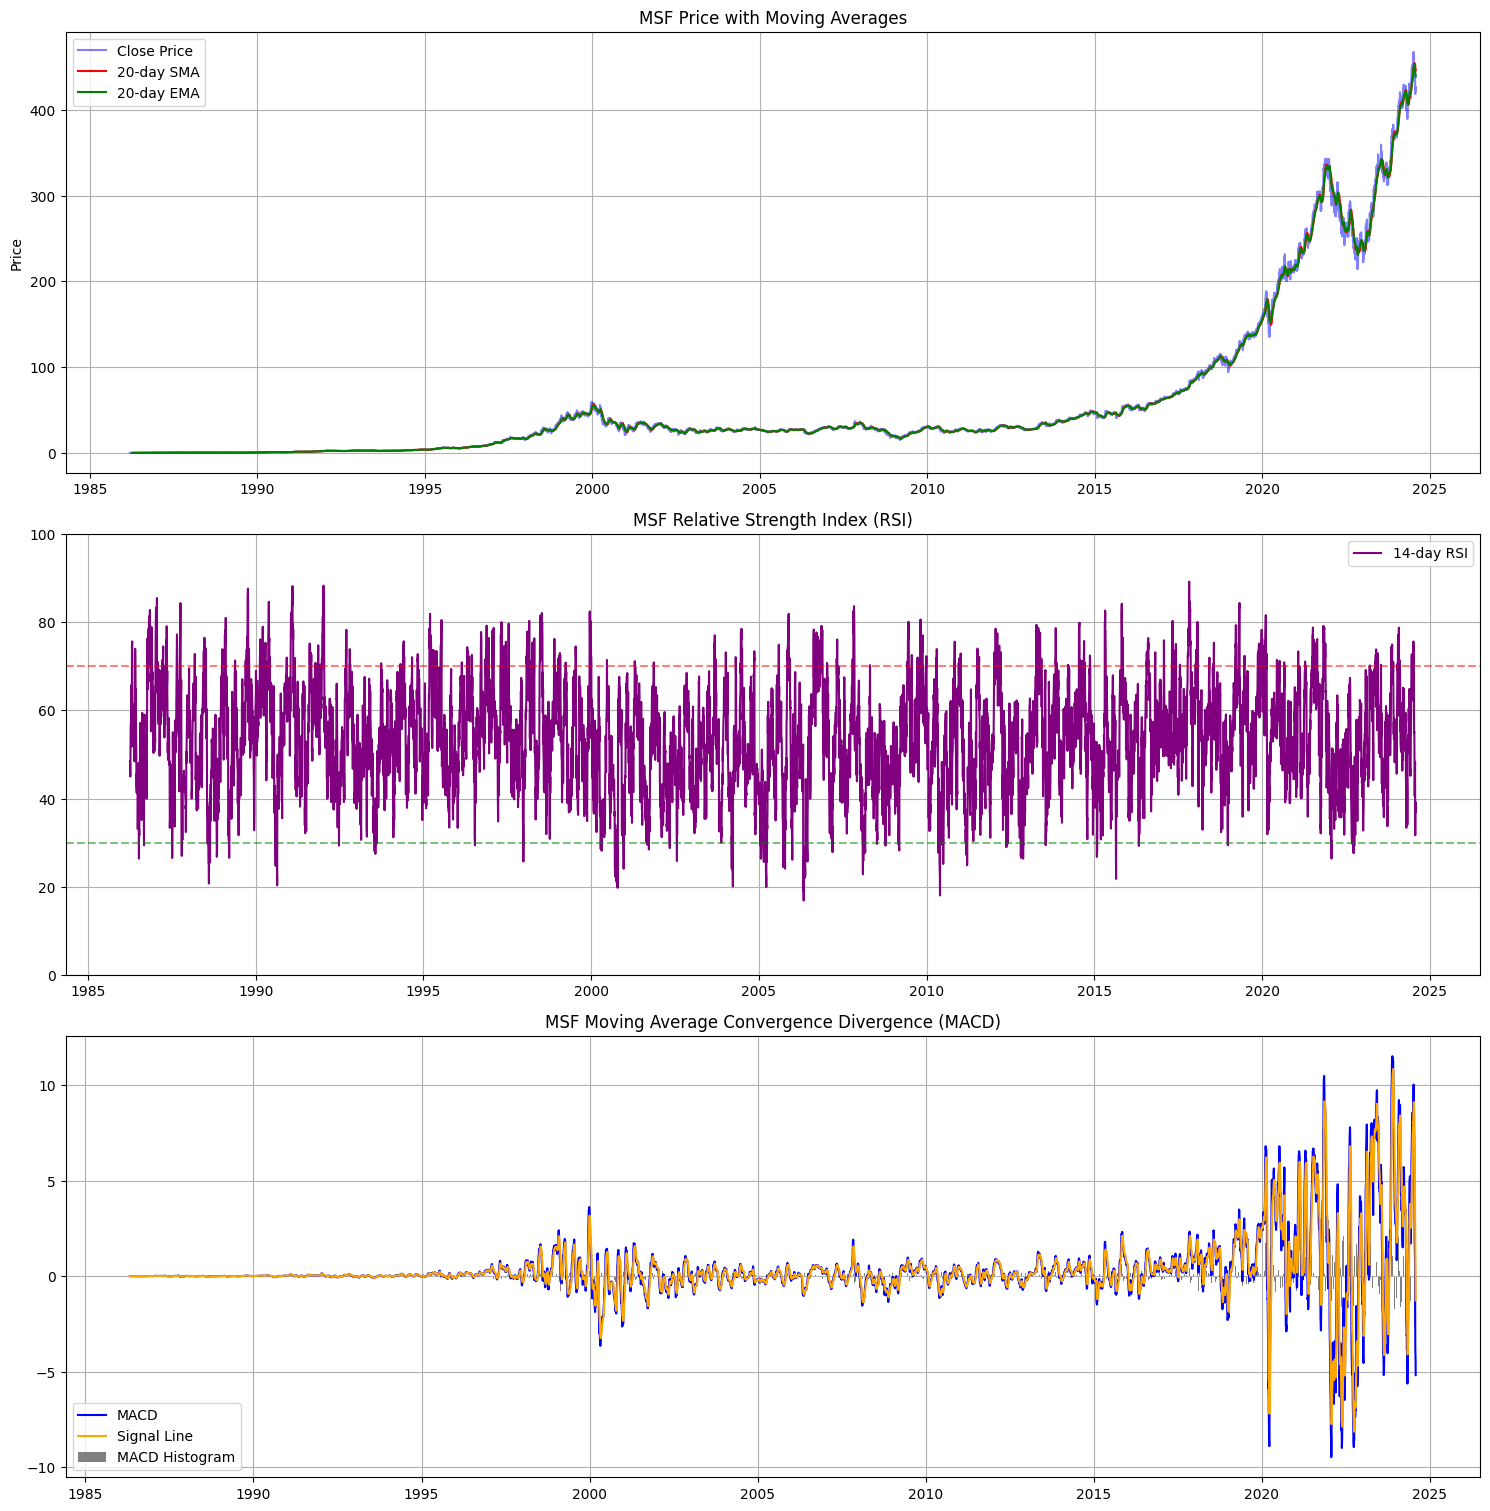


--- NVDA ---


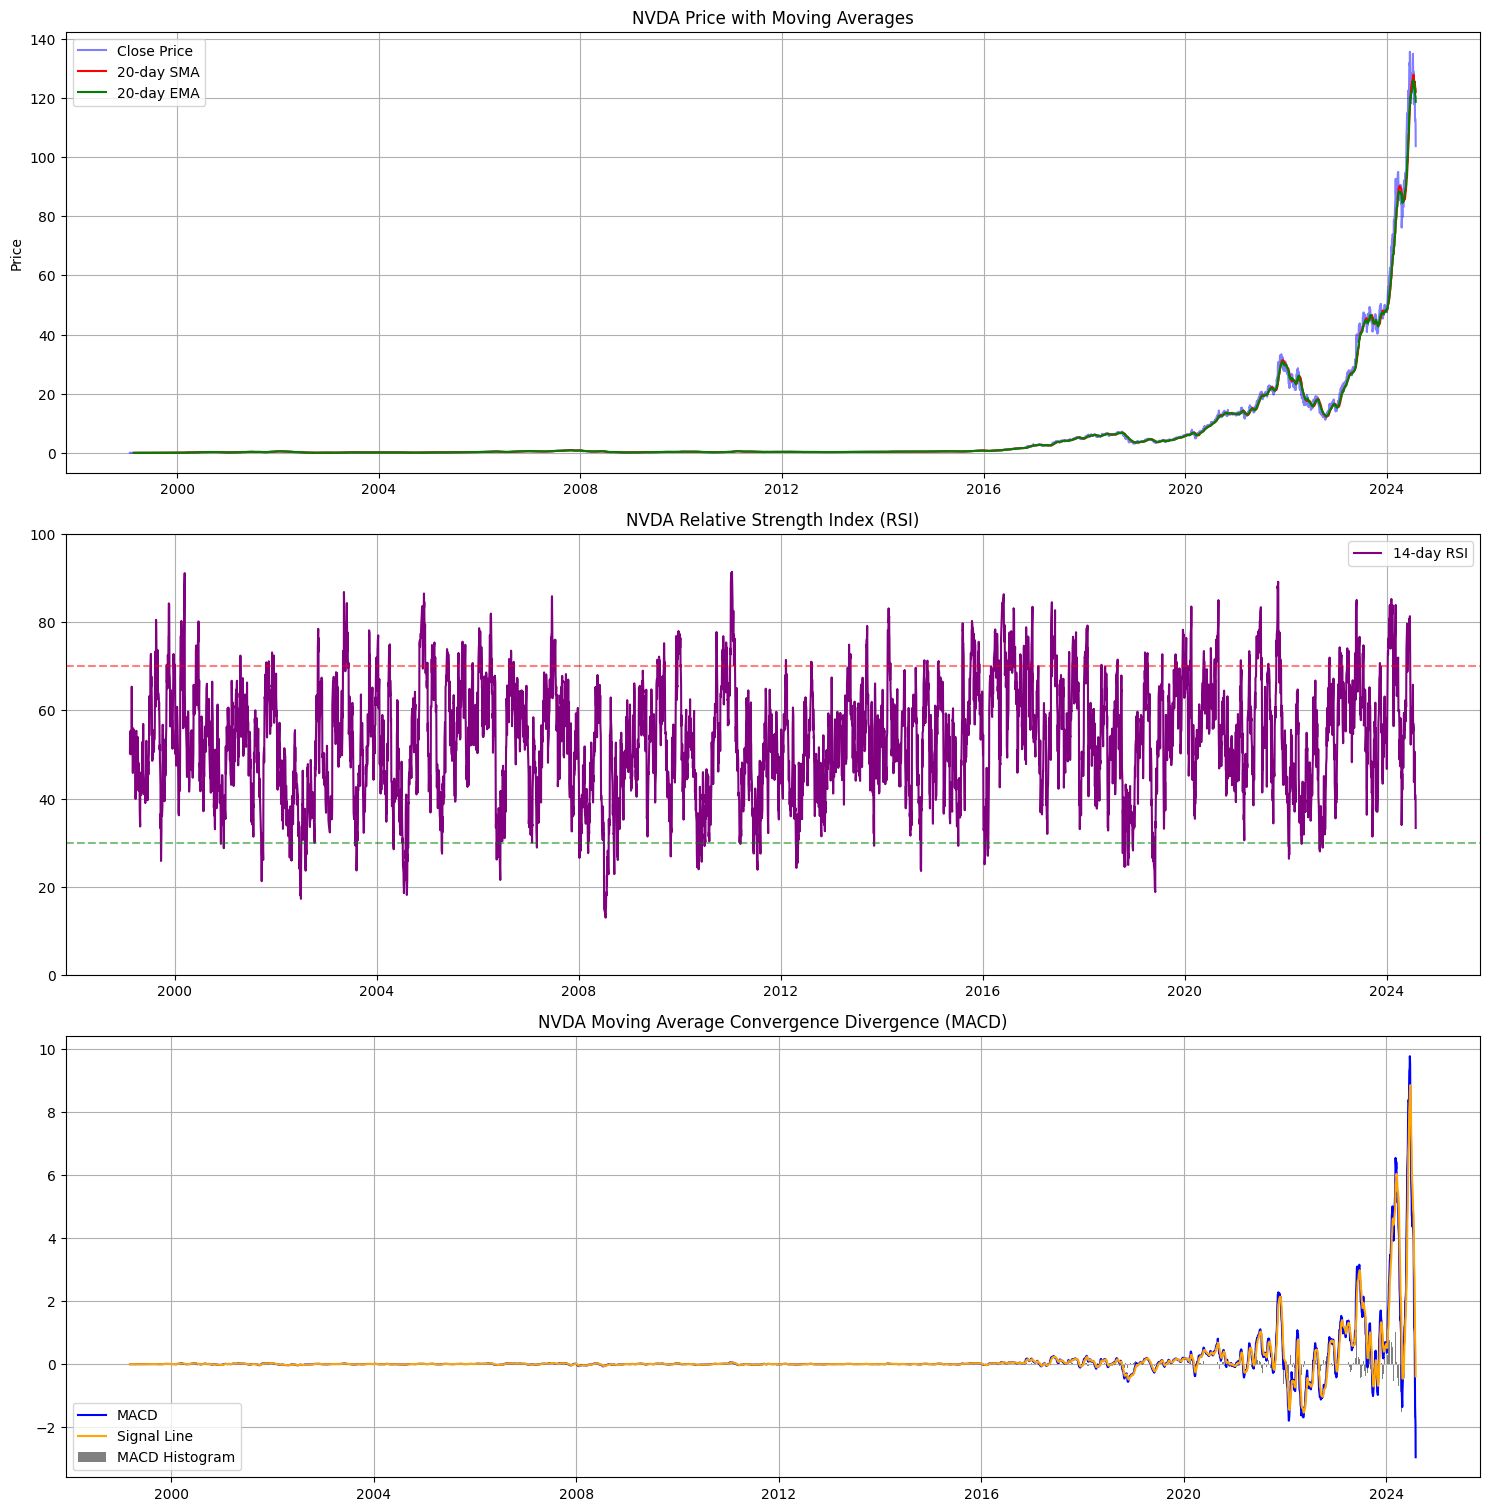


--- TSLA ---


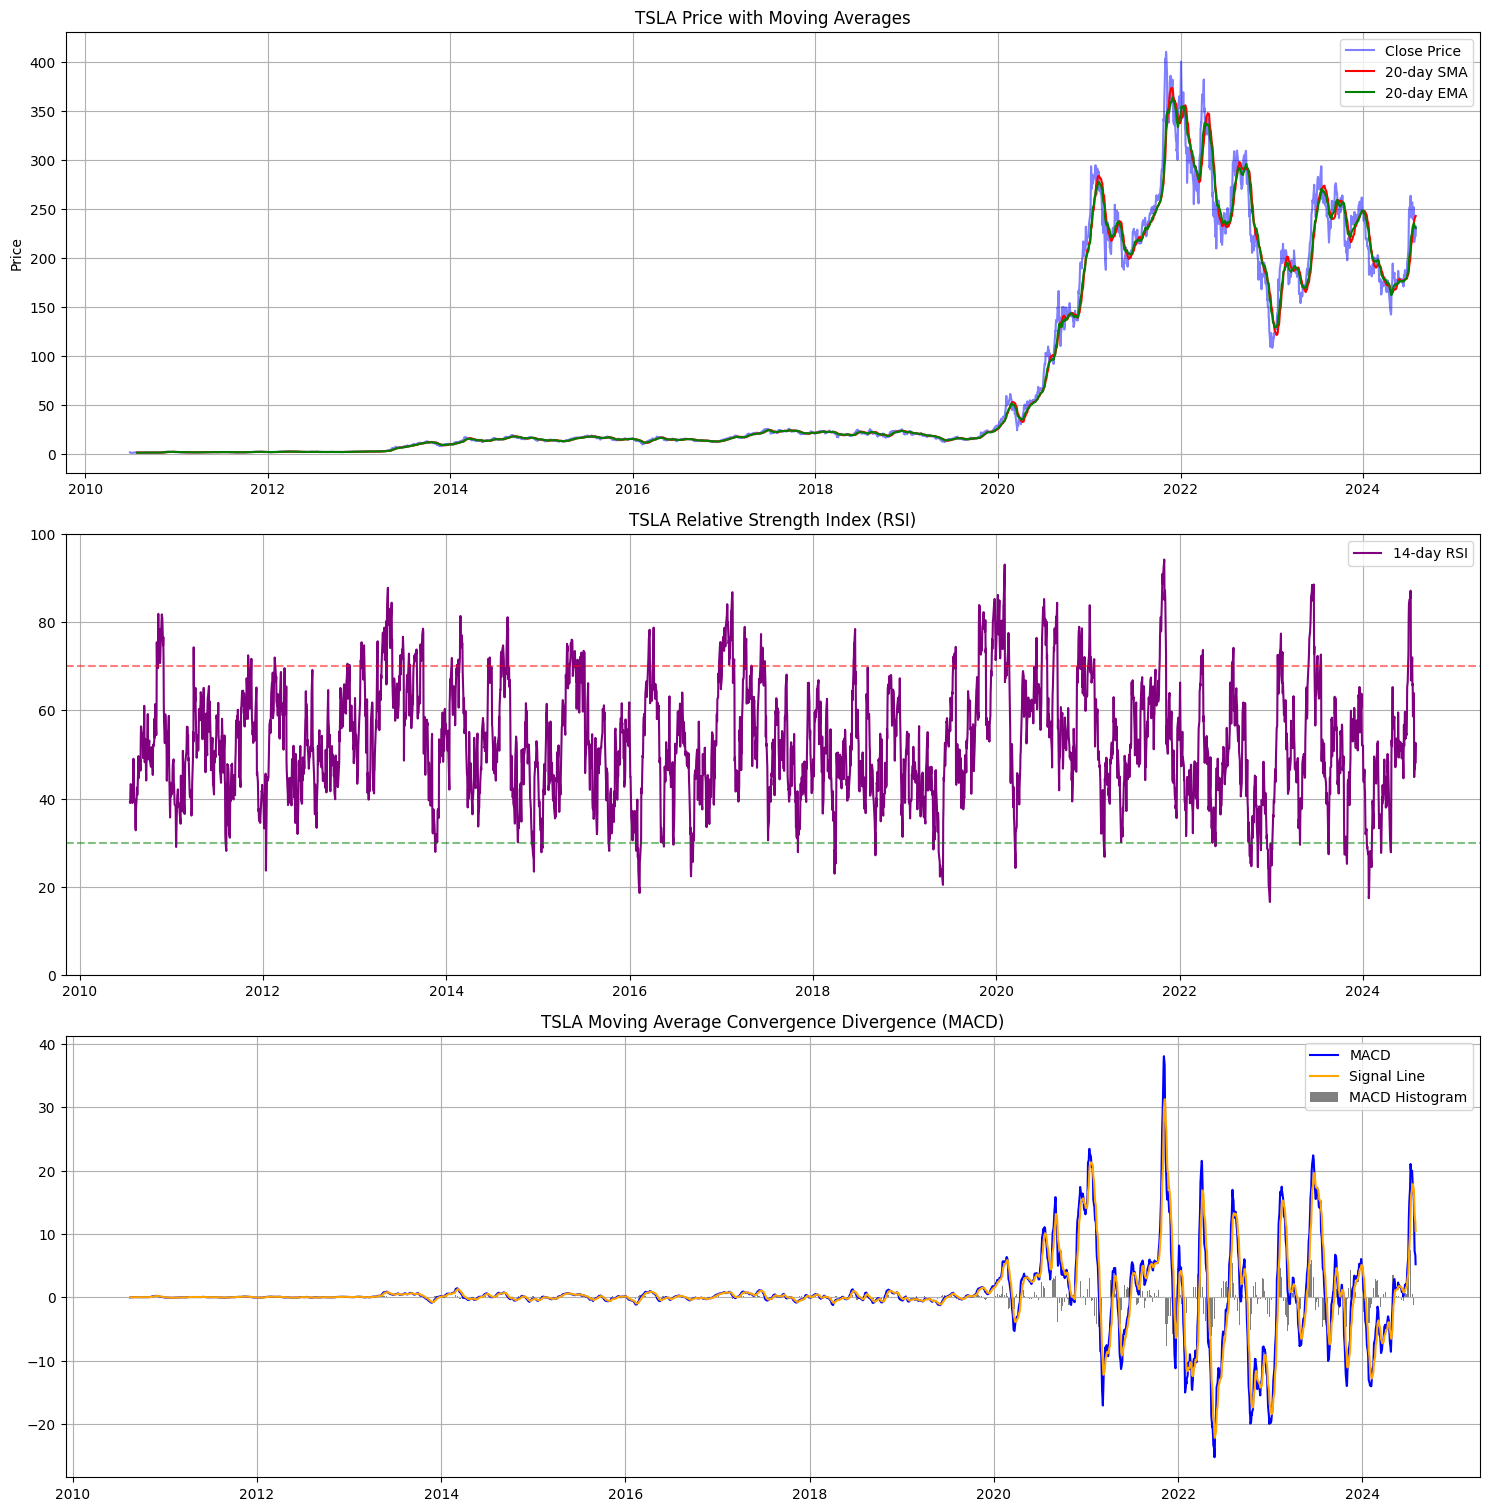

In [9]:
# Plot the indicators
for stock, df in data_dict.items():
    quantitativeAnalysis = QuantitativeAnalysis(df, stock)
    print(f"\n--- {stock} ---")
    quantitativeAnalysis.plot_price_with_indicators()
    plt.show()



--- AAPL ---


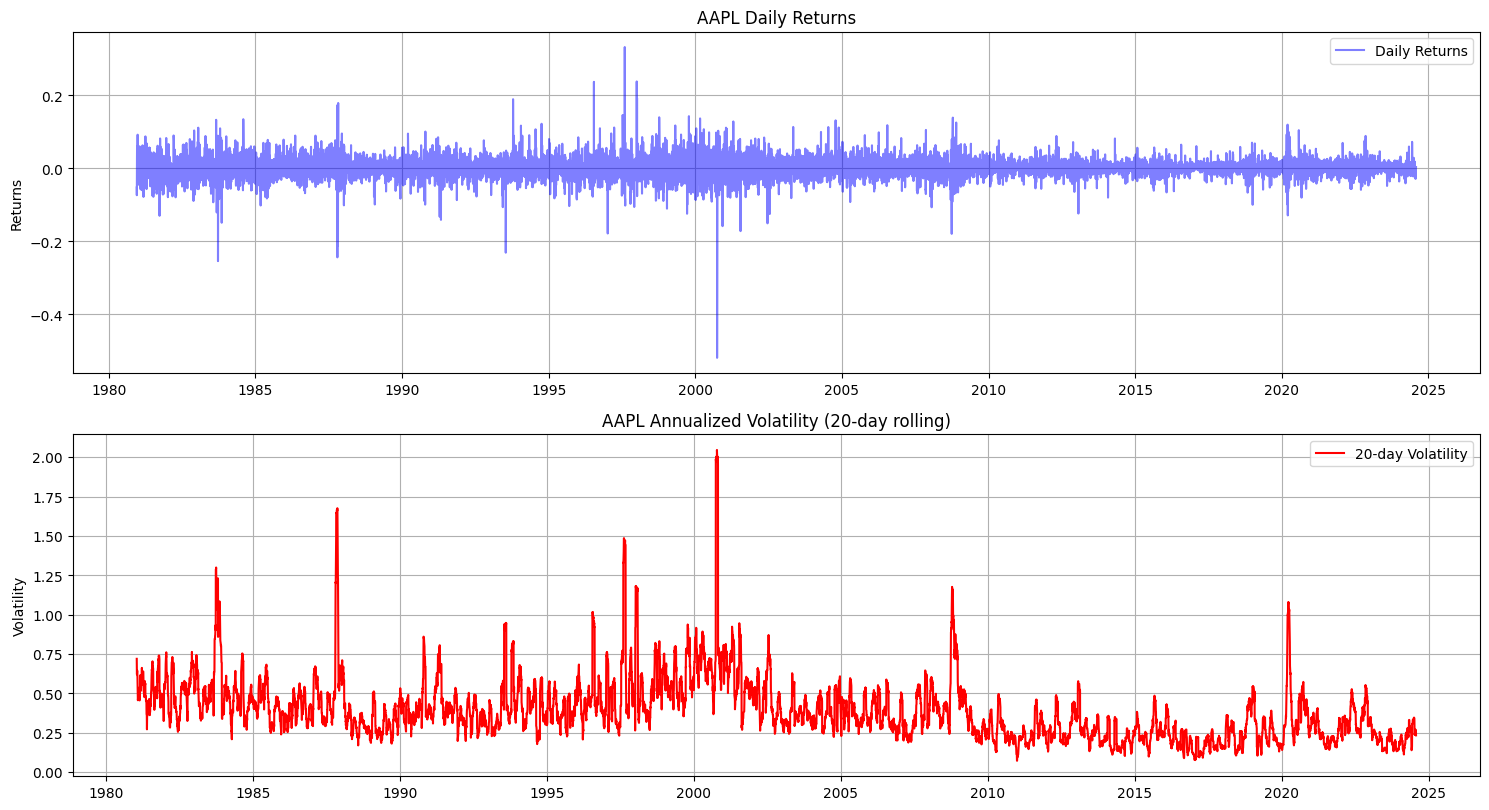


--- AMZN ---


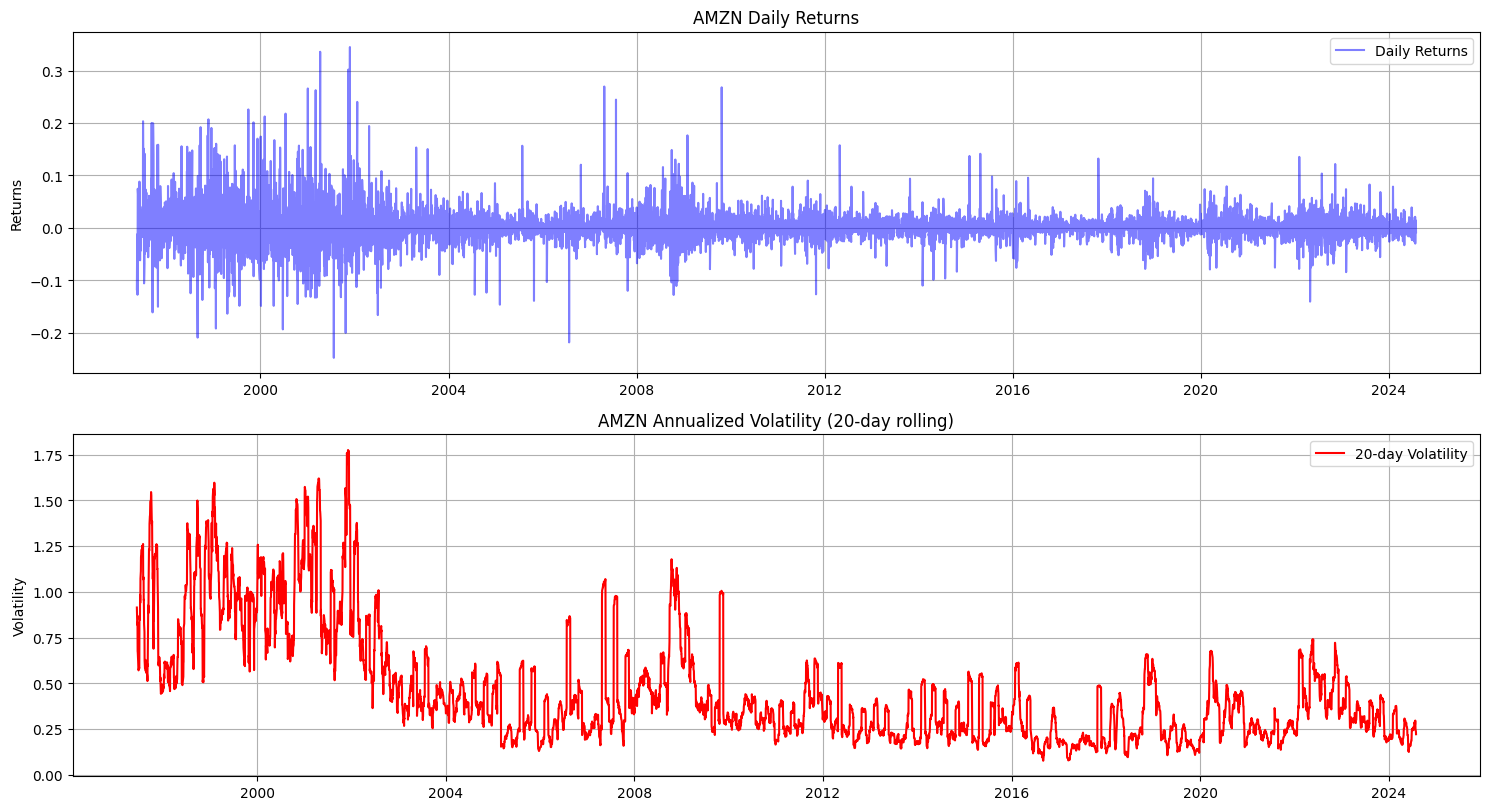


--- GOOG ---


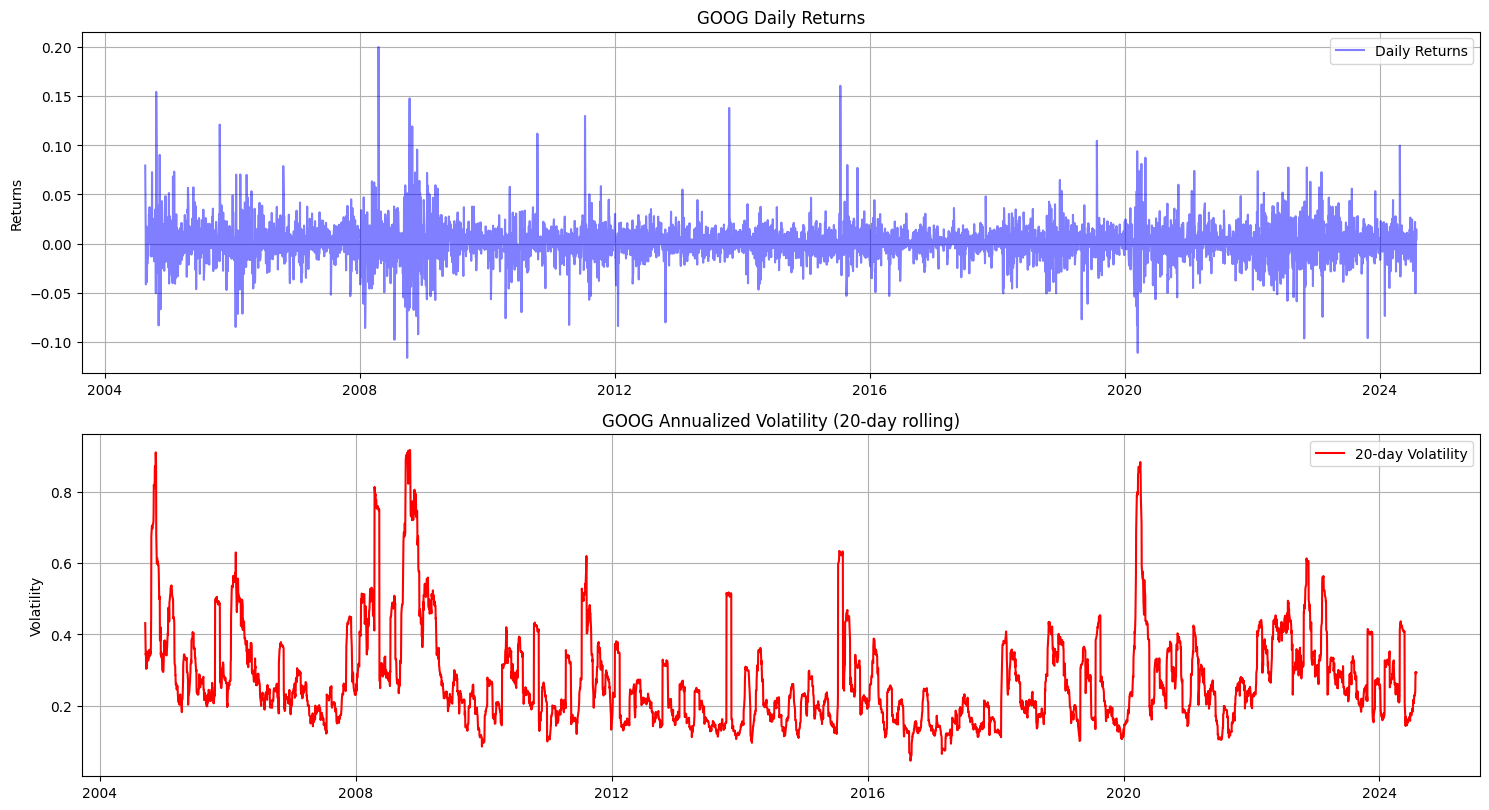


--- FB ---


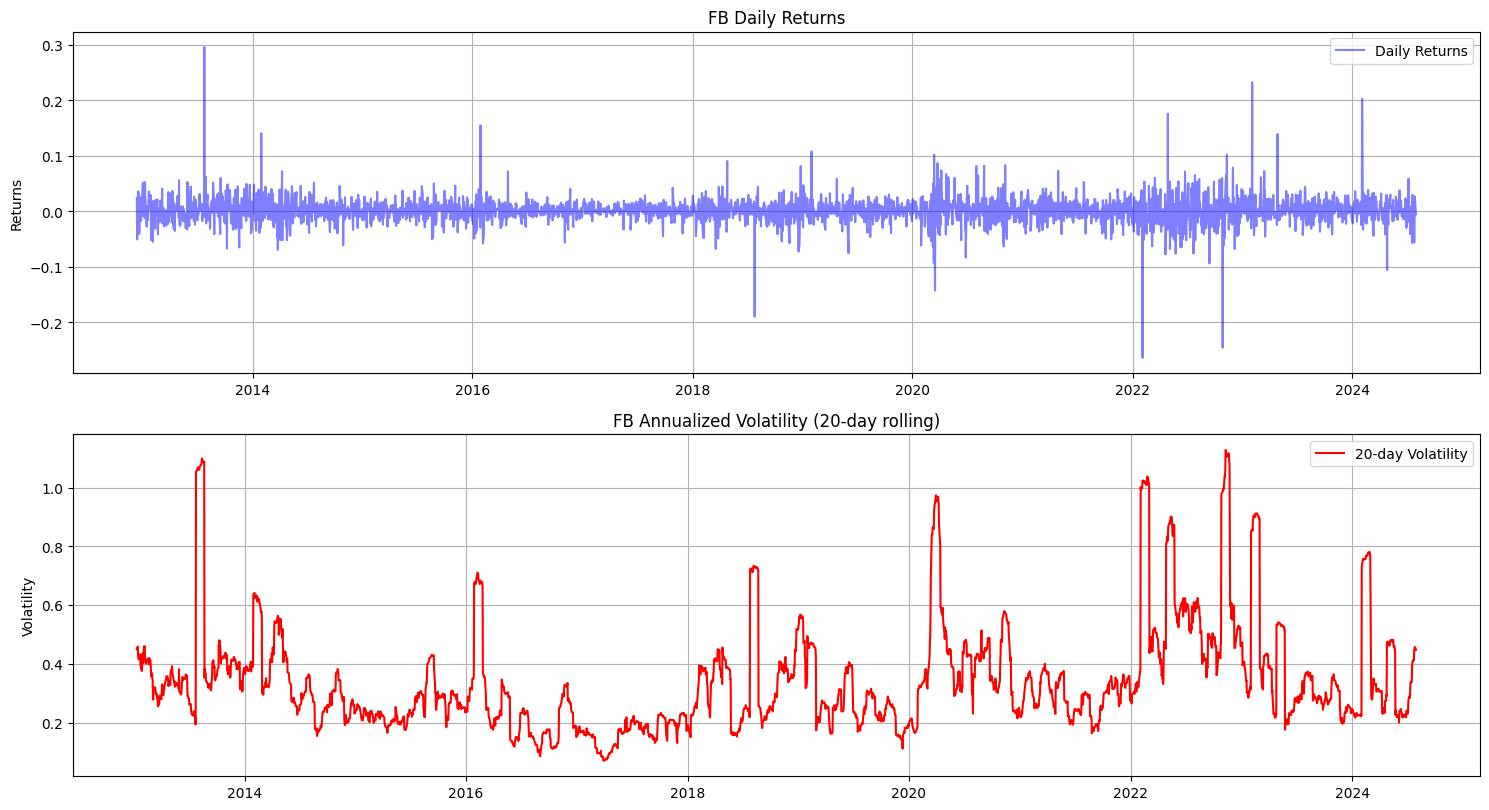


--- MSF ---


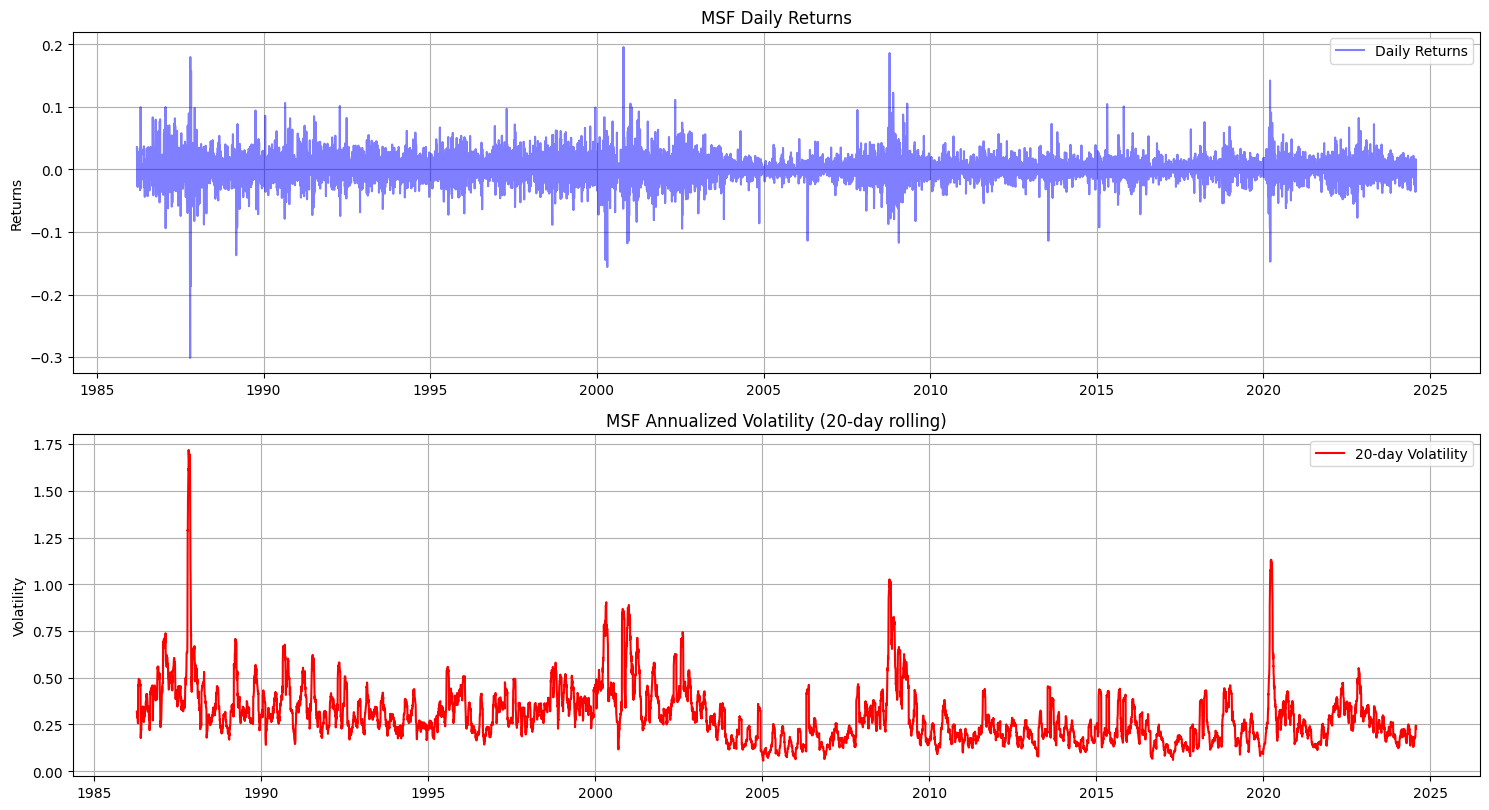


--- NVDA ---


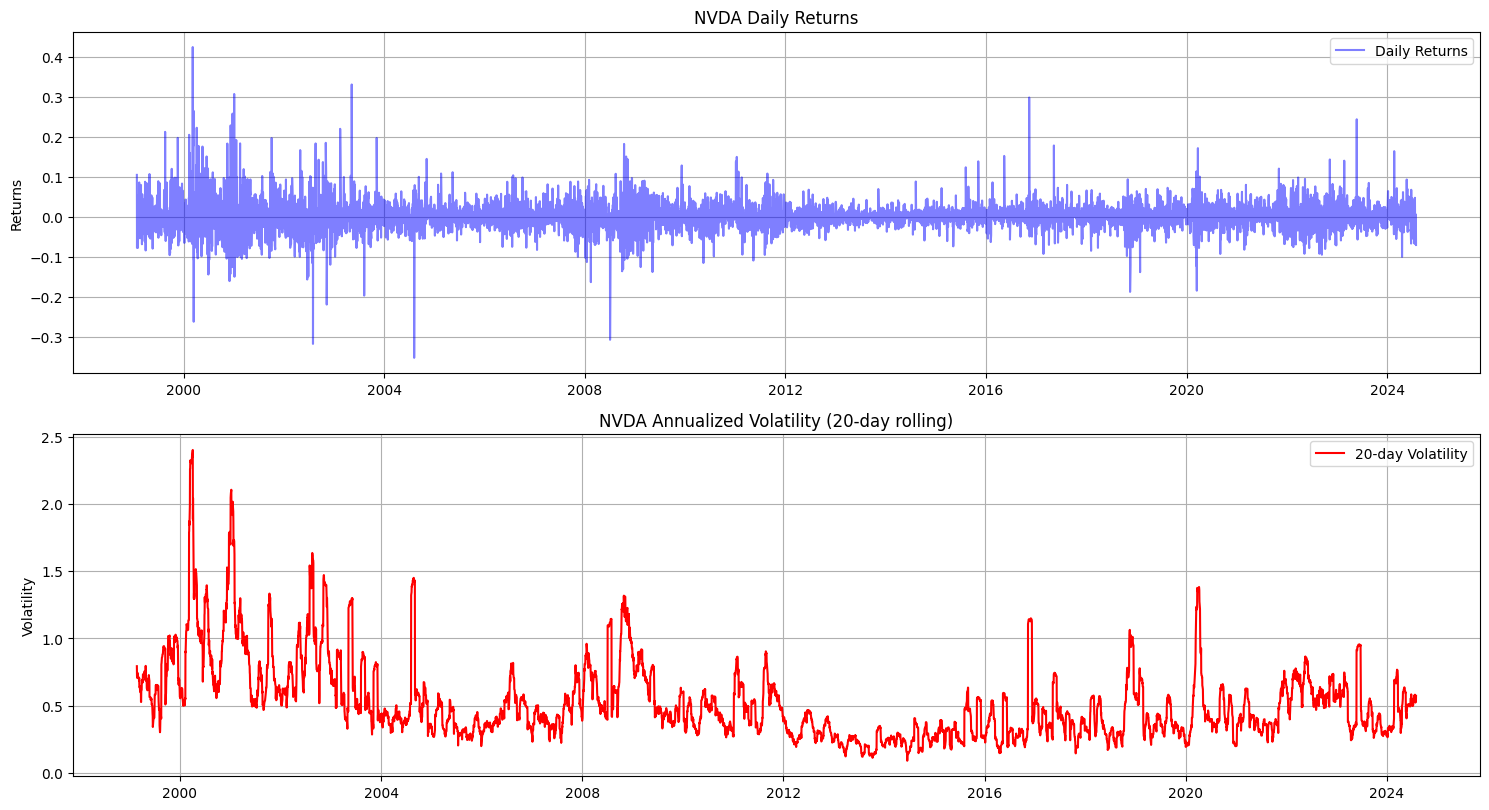


--- TSLA ---


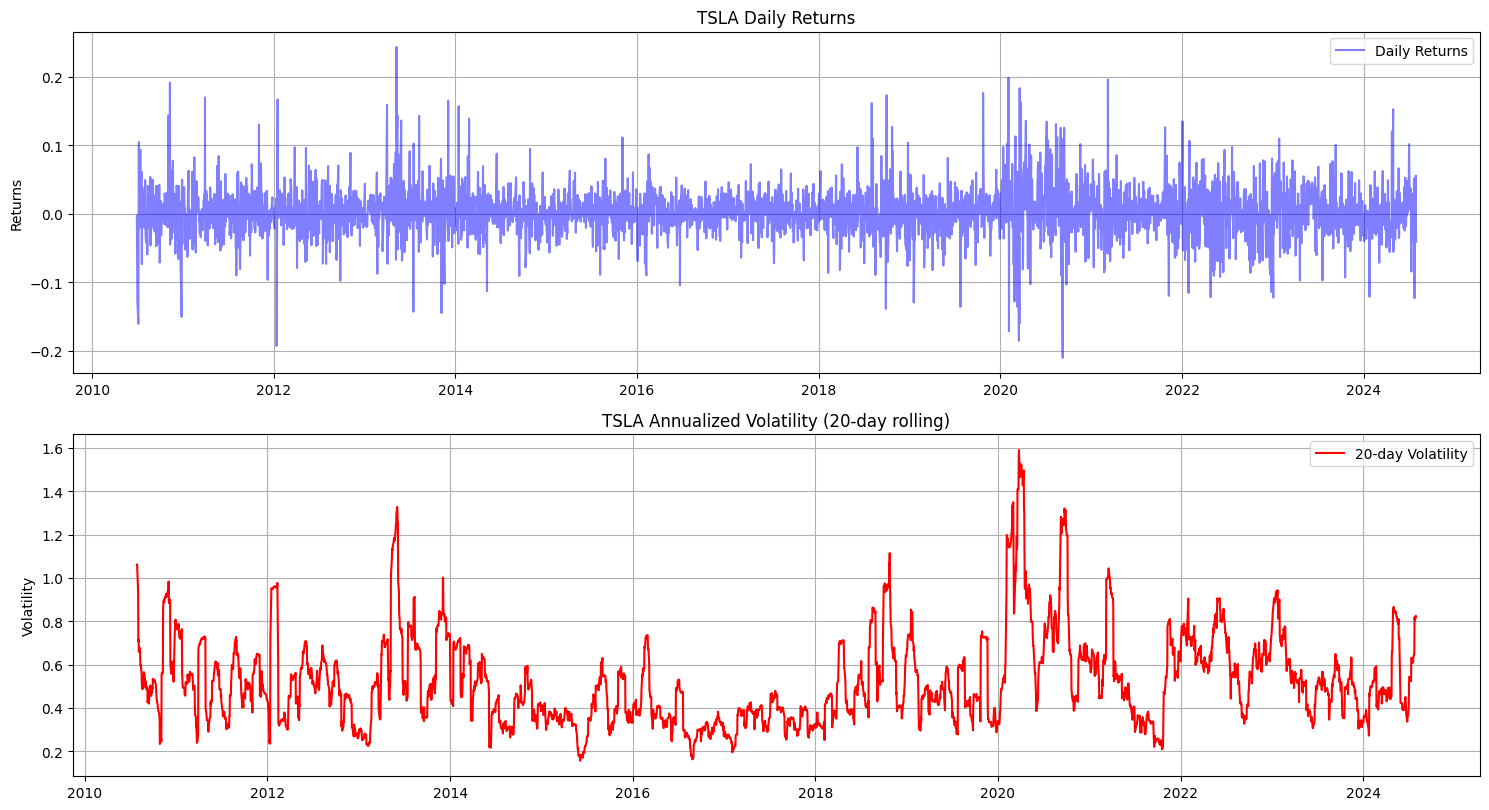

In [10]:
# Plot financial metrics
for stock, df in data_dict.items():
    quantitativeAnalysis = QuantitativeAnalysis(df, stock)
    print(f"\n--- {stock} ---")
    quantitativeAnalysis.plot_financial_metrics()
    plt.show()